In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('/home/mcsava/ds_bootcamp/Rent-data-project/release/Release 2/_data.csv', index_col=0)
type(df)

pandas.core.frame.DataFrame

In [91]:
# Индексируем данные по детям/животным
kids_dict = {
    'Можно с детьми, Можно с животными' : 3,
    'Можно с детьми' : 2,
    'Можно с животными' : 2,
    'Нельзя' : 1
}

df['kids_pets_allowed'] = df['kids_pets_allowed'].replace(kids_dict).astype(int)

/tmp/ipykernel_7884/2010466726.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['kids_pets_allowed'] = df['kids_pets_allowed'].replace(kids_dict).astype(int)


In [92]:
# Индексируем данные по ремонту
renovation_dict = {
    'Дизайнерский' : 3,
    'Евроремонт' : 3,
    'Косметический' : 2,
    'Без ремонта' : 1
}

df['Ремонт'] = df['Ремонт'].replace(renovation_dict).astype(int)

/tmp/ipykernel_7884/1541555978.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ремонт'] = df['Ремонт'].replace(renovation_dict).astype(int)


In [95]:
# Индексируем данные по парковкам
parking_dict = {
    'на крыше' : 4,
    'многоуровневая' : 3,
    'подземная' : 3,
    'открытая' : 2,
    'наземная' : 1
}

df['parking'] = df['parking'].replace(parking_dict).astype(int)

/tmp/ipykernel_7884/2030676121.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['parking'] = df['parking'].replace(parking_dict).astype(int)


In [96]:
# Форматируем данные по комнатам
df['Rooms'] = df['Rooms'].astype(int)

In [97]:
# Индексируем данные по балконам и лоджиям
df['balcony_and_loggy'] = df['balcony'] + df['loggy']

df = df.drop(['loggy', 'balcony'], axis=1)

df['balcony_and_loggy'] = df['balcony_and_loggy'].apply(lambda x: 1 if x == 0 else 2 if 0 < x < 3 else 3)


In [98]:
# Индексируем данные по лифтам
df['sum_lift'] = df['lift_pass'] + df['lift_cargo']

df = df.drop(['lift_pass', 'lift_cargo'], axis=1)

df['sum_lift'] = df['sum_lift'].apply(lambda x: 1 if x == 0 else 2 if x == 1 else 3 if x==2 else 4)

In [100]:
# Индексируем данные по санузлам 
df['sum_bath'] = df['bath_sep'] + df['bath_comb']

df = df.drop(['bath_sep', 'bath_comb'], axis=1)

df['sum_bath'] = df['sum_bath'].apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3)

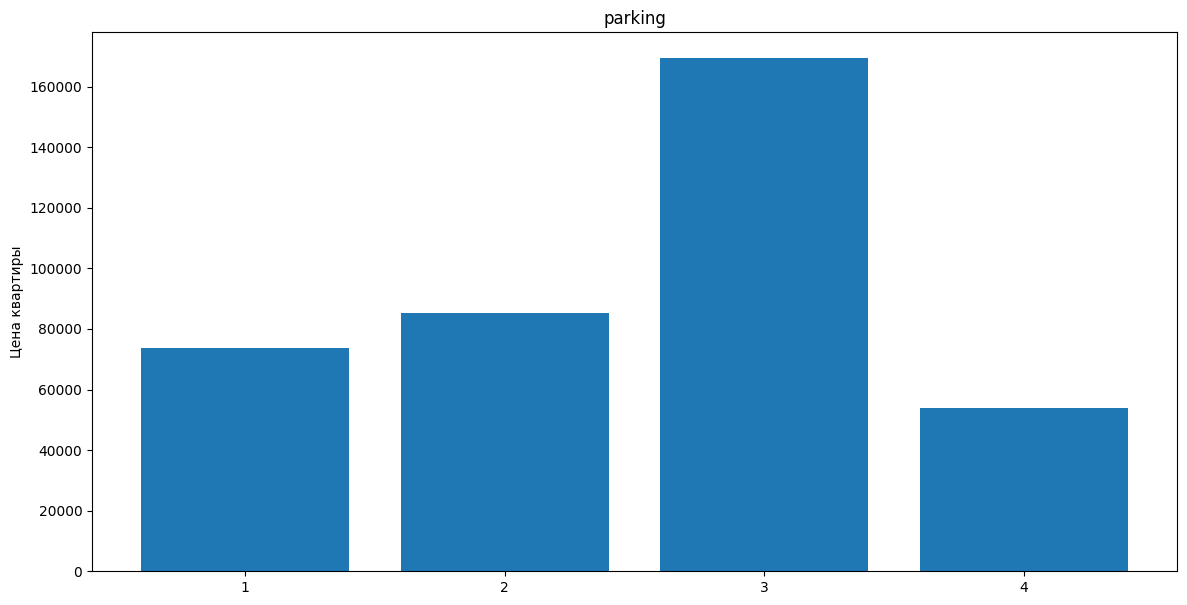

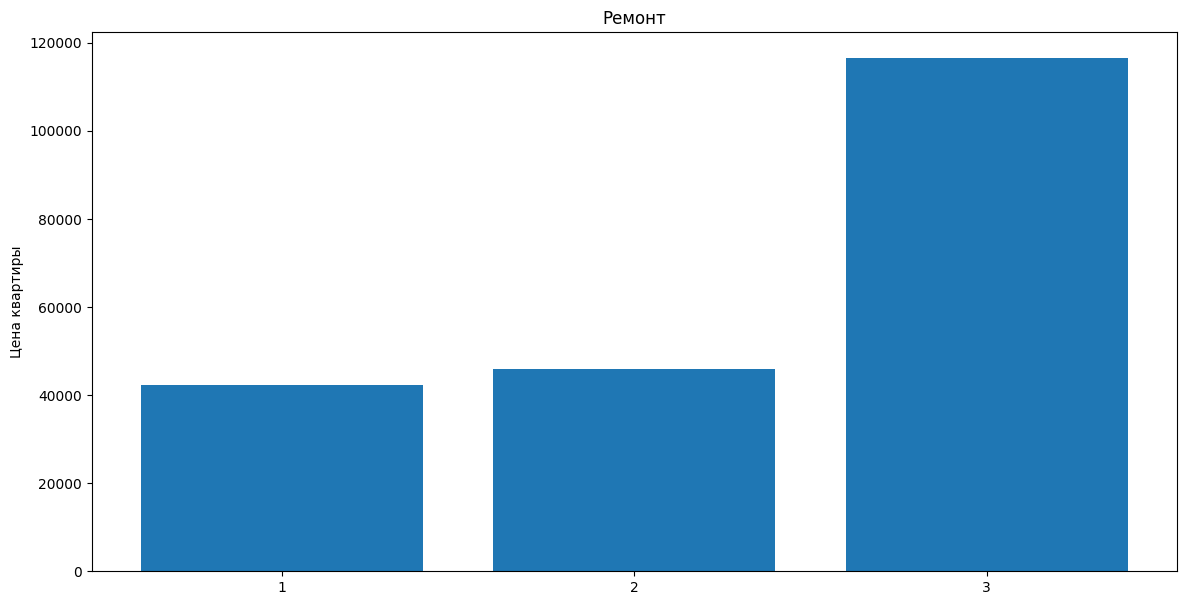

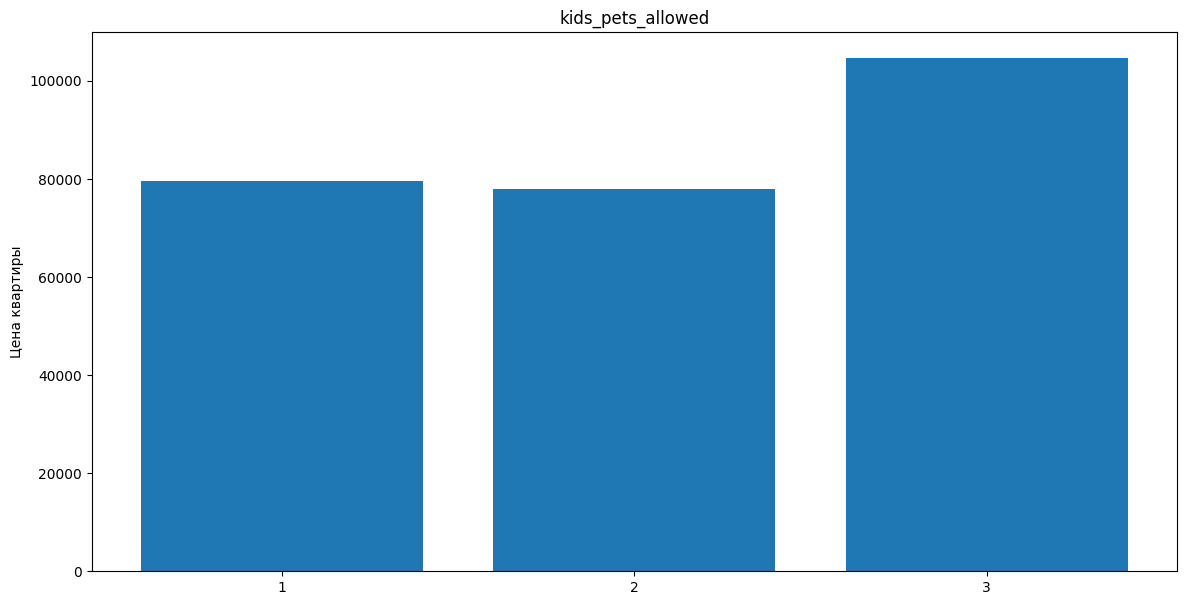

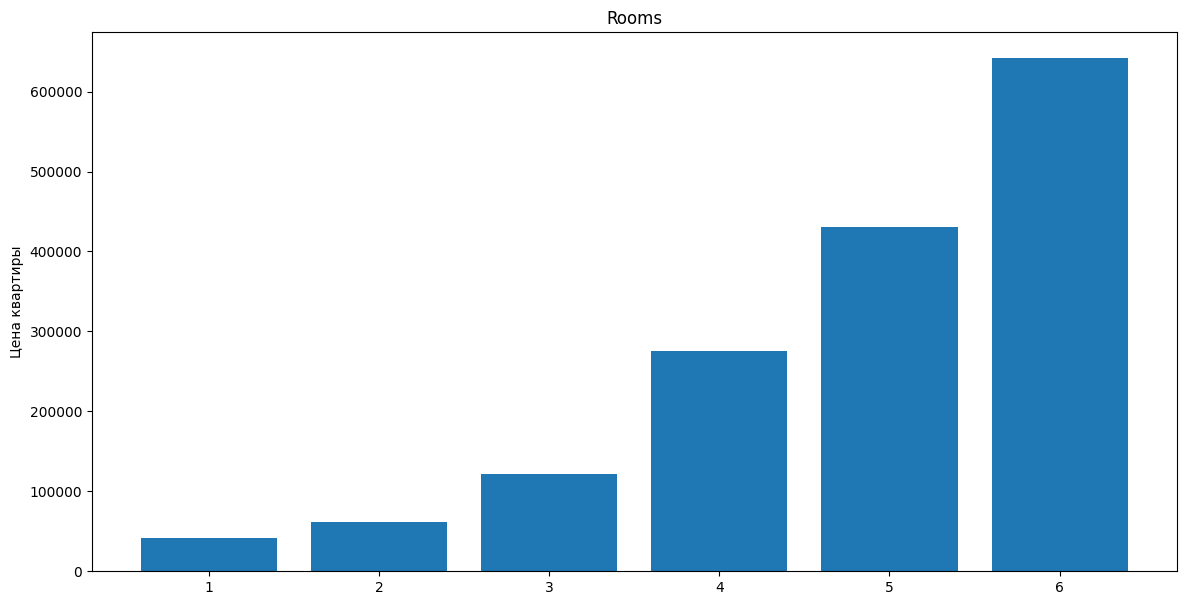

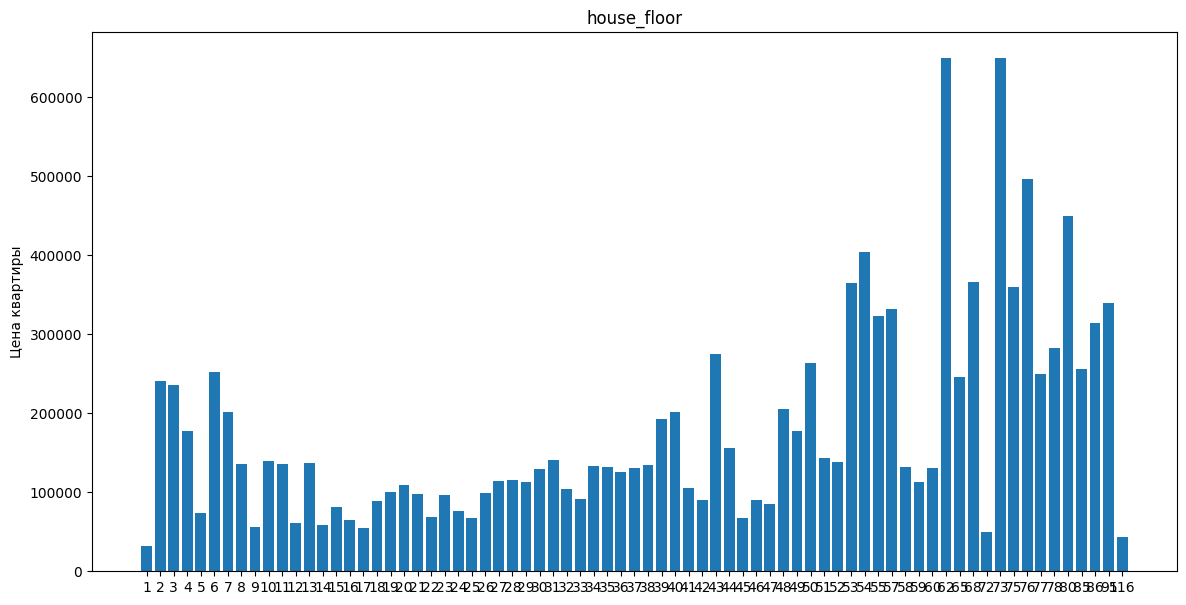

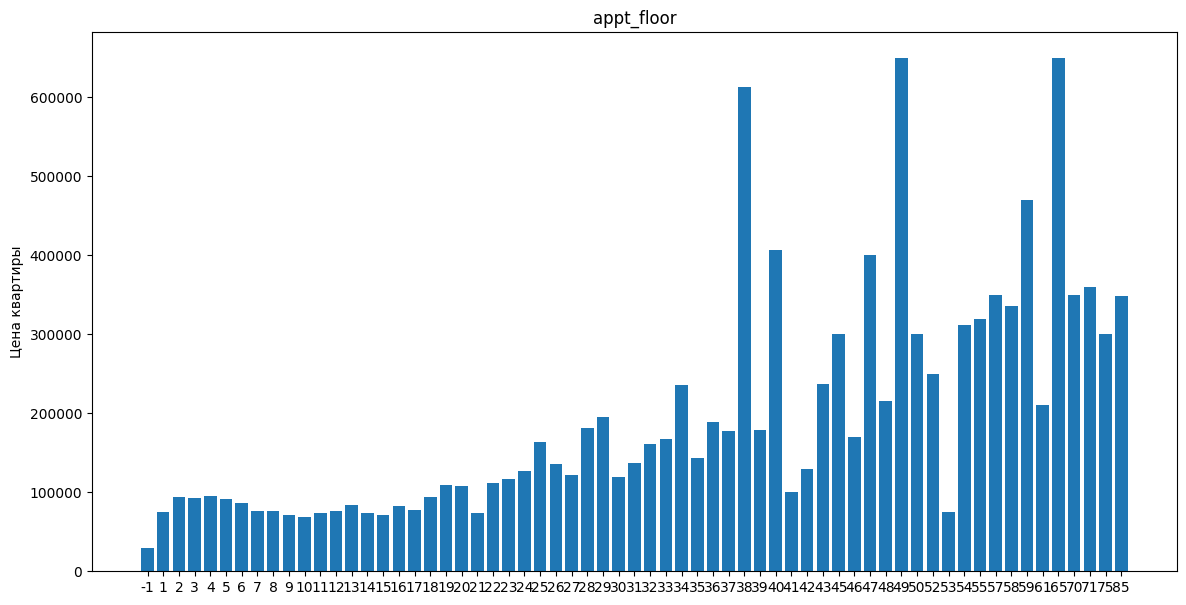

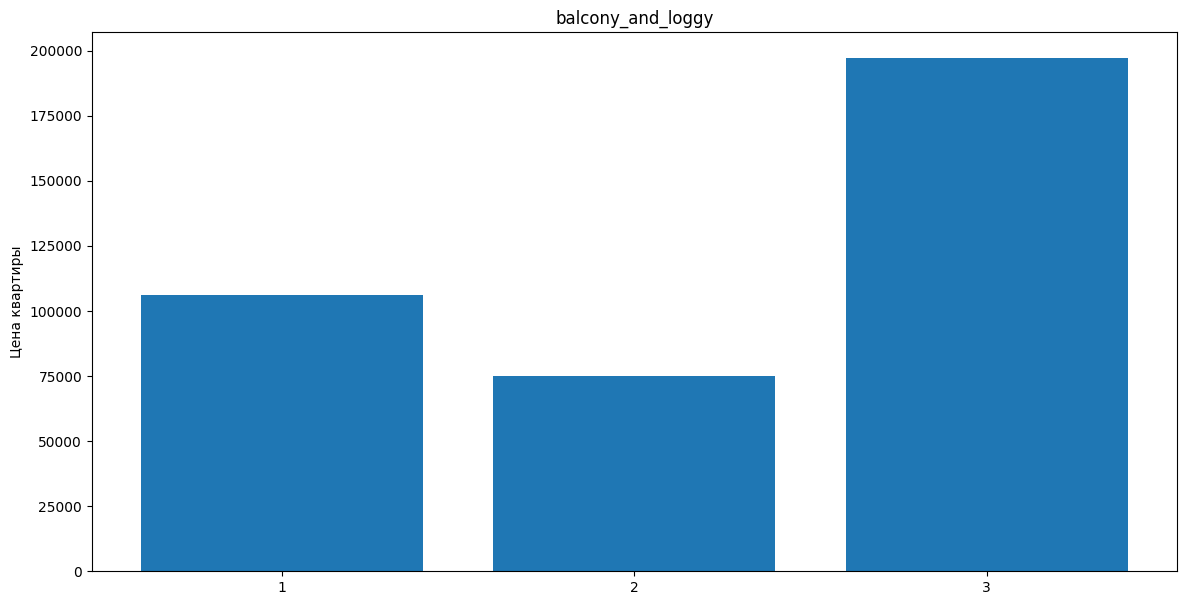

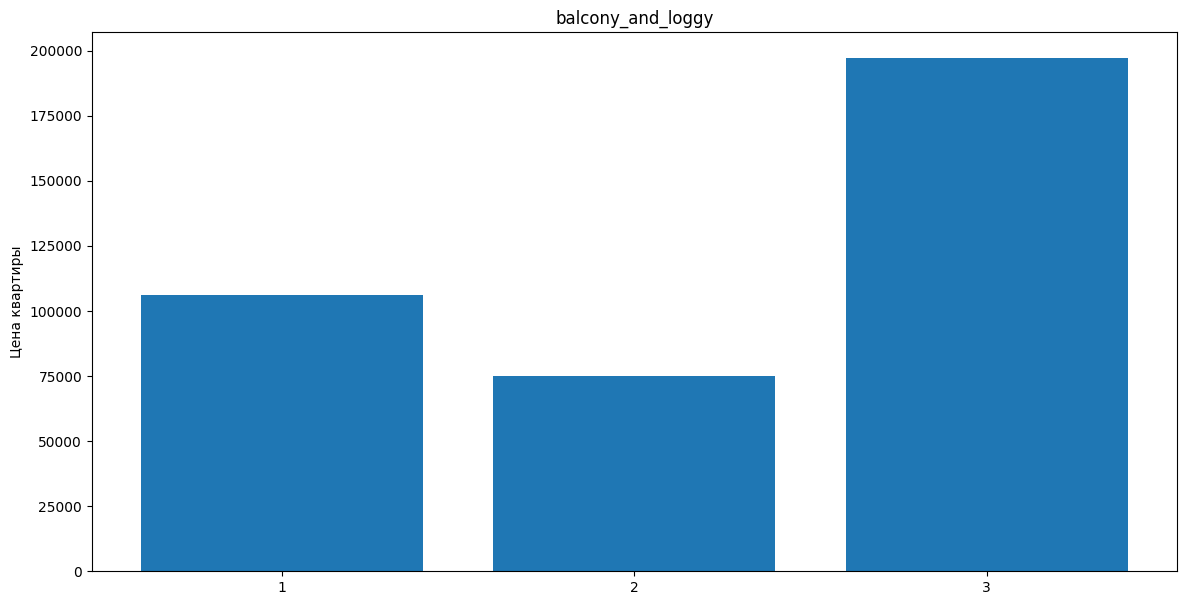

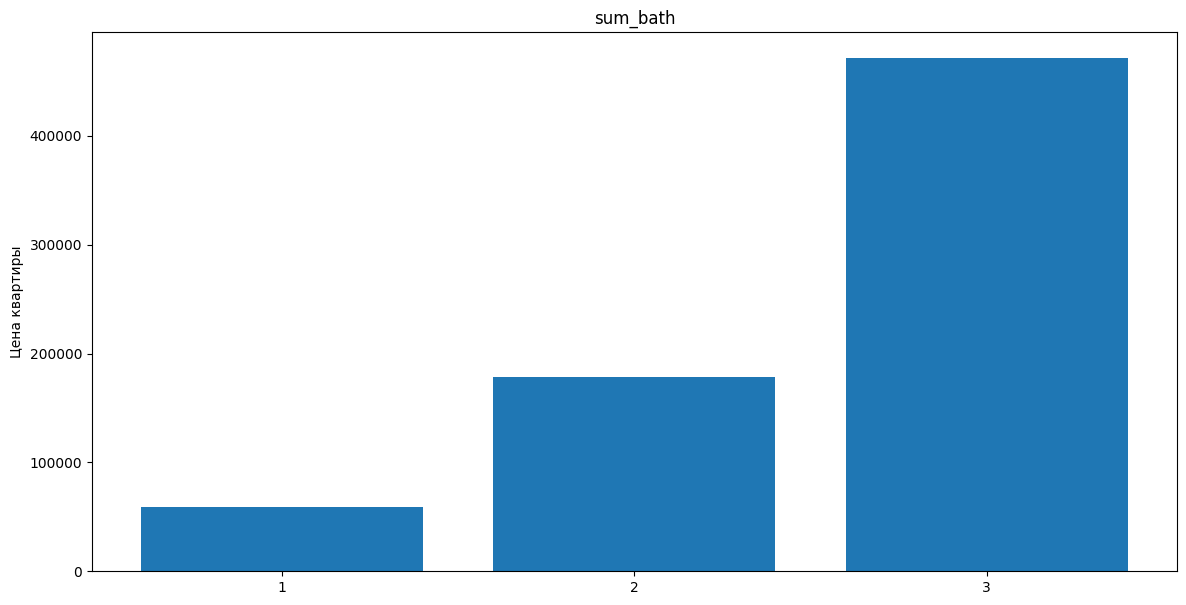

In [114]:
def plot_mean_price(column):
    plt.figure(figsize=(14, 7)) 
    n_bars = np.arange(len(df[column].unique())) # массив с кол-во уникальных значений в каждой катег колонке.
    
    # создание дф по каждой колонке групируя категории по средней цене
    grouped = pd.DataFrame(df.groupby([column])['Clear_price'].mean().round())
    
    plt.title(column) 
    plt.ylabel('Цена квартиры')
    plt.bar(n_bars, grouped['Clear_price']) 
    plt.xticks(n_bars, grouped.index); 


categorical = ['parking', 'Ремонт', 'kids_pets_allowed', 'Rooms', 'house_floor', 'appt_floor', 'balcony_and_loggy', 'balcony_and_loggy', 'sum_bath']

for col in categorical:
    plot_mean_price(col)

house_floor
1         5
2        39
3       117
4       265
5      2332
       ... 
80        1
85       16
86        2
95        4
116       1
Length: 73, dtype: int64